In [56]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


# Data Preprocessing

In [5]:
data.shape

(7920, 3)

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

# Text Preprocessing

In [8]:
import re
import string

In [10]:
data['tweet'].head()

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [11]:
# Convert uppercase to lowercase
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [12]:
data['tweet'].head()

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [13]:
# Remove links
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [14]:
# Remove punctuations
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [15]:
data['tweet'].head()

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [19]:
data['tweet'].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [17]:
# Remove numbers
data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\pramo\AppData\Local\Temp\ipykernel_9824\906296871.py:2: SyntaxWarning: invalid escape sequence '\d'
  data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)


In [18]:
data['tweet'].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [20]:
# Remove stopwords
%pip install nltk

  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3

In [21]:
import nltk

In [22]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [23]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()
    
# sw

In [25]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [26]:
data['tweet'].head(10)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
5    iphone software update fucked phone big time s...
6    happy us instapic instadaily us sony xperia xp...
7    new type c charger cable uk … bay amazon etsy ...
8    bout go shopping listening music iphone justme...
9    photo fun selfie pool water sony camera picoft...
Name: tweet, dtype: object

In [27]:
# Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [28]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [29]:
data['tweet'].head(10)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
5    iphon softwar updat fuck phone big time stupid...
6    happi us instap instadaili us soni xperia xperiaz
7    new type c charger cabl uk … bay amazon etsi n...
8    bout go shop listen music iphon justm music li...
9    photo fun selfi pool water soni camera picofth...
Name: tweet, dtype: object

## Building Vocabulary

In [31]:
from collections import Counter
vocab = Counter()

In [33]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [35]:
len(vocab)

15949

In [36]:
tokens = [key for key in vocab if vocab[key] > 10]
#tokens

In [38]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

## Train/Test Data

In [39]:
x = data['tweet']
y = data['label']

In [45]:
%pip install scikit-learn

  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl (11.0 MB)
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [48]:
x_train.shape

(6336,)

In [49]:
x_test.shape

(1584,)

## Vectorization

In [60]:
import numpy as np


def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [63]:
vectorized_x_train = vectorizer(x_train, tokens)

In [65]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [66]:
vectorized_x_test = vectorizer(x_test, tokens)

In [67]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Treat for imbalanced dataset

In [68]:
y_train.value_counts()

label
0    4712
1    1624
Name: count, dtype: int64

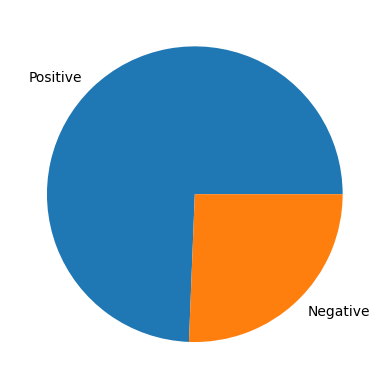

In [69]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [70]:
%pip install imbalanced-learn

In [71]:
from imblearn.over_sampling import SMOTE
somte = SMOTE()
vectorized_x_train_somte, y_train_smote = somte.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_somte.shape, y_train_smote.shape)

(9424, 1145) (9424,)


In [72]:
y_train_smote.value_counts()

label
0    4712
1    4712
Name: count, dtype: int64

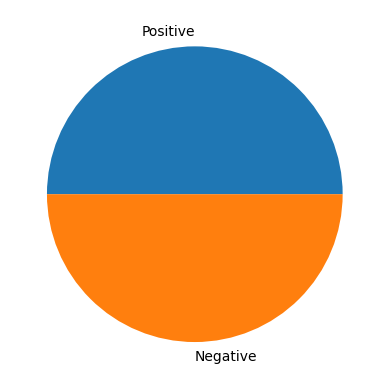

In [73]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

## Model Training and Evaluations

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [75]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

In [81]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(vectorized_x_train_somte, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_somte)
y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.94
	Precision = 0.917
	Recall = 0.967
	F1-Score = 0.942
Testing Scores:
	Accuracy = 0.871
	Precision = 0.71
	Recall = 0.828
	F1-Score = 0.765


In [82]:
# Naive Bayes
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_somte, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_somte)
y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.908
	Precision = 0.871
	Recall = 0.958
	F1-Score = 0.912
Testing Scores:
	Accuracy = 0.86
	Precision = 0.663
	Recall = 0.91
	F1-Score = 0.767


In [83]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_somte, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_somte)
y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.838
	Precision = 0.679
	Recall = 0.689
	F1-Score = 0.684


In [84]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_somte, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_somte)
y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.869
	Precision = 0.755
	Recall = 0.719
	F1-Score = 0.736


In [ ]:
# Support Vector Machine
svm = SVC()
svm.fit(vectorized_x_train_somte, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_somte)
y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)